In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df  = pd.read_excel("../Dataset/anxiety-disorderp-data.xlsx")
df.head()

,Subject,Irritability,Increased unnecessary whole body movements in specific situations,Difficulty concentrating on tasks or play activity independently,Difficulty concentrating on adult-directed tasks or play activities,Inattention,Fear about possible harm befalling major attachment figures,Onset Fear about possible harm befalling major attachment figures,Fear about calamitous separation,Onset Fear about calamitous separation,...,Worry about the future,Worries about natural calamity,Worries about past behavior,Worries about competence or performance,Worries about appearance,Worries about money/food,Other worries,Sampling Weight,SAD,GAD
0,Train001,2.0,2.0,0.0,0.0,2.0,0.0,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0.302648,0,0
1,Train002,0.0,0.0,0.0,0.0,0.0,2.0,312.0,0.0,NaN,...,0,0,0,0,0,0,2,0.332575,1,1
2,Train003,0.0,0.0,2.0,0.0,0.0,0.0,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0.332575,1,0
3,Train004,3.0,2.0,3.0,2.0,2.0,0.0,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0.332575,0,0
4,Train005,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,0,0,0,0,0,0,0,5.345884,0,0


In [3]:
X_train = df.drop(['SAD', 'GAD',"Subject","Onset Child tries unsuccessfully to leave daycare/school due to anxiety","Onset Has to be taken to daycare/school because of separation anxiety","Onset Fear about calamitous separation","Onset Child leaves daycare/school due to anxiety"], axis=1)
y_SAD = df['SAD']
y_GAD = df['GAD']

In [4]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
    ])

In [6]:
model = RandomForestClassifier(n_estimators=917, random_state=0)

In [7]:
pipeline_SAD = Pipeline(steps=[('preprocessor',preprocessor),
                               ('model', model)])

In [8]:
X_train_SAD, X_test_SAD, y_train_SAD, y_test_SAD = train_test_split(X_train, y_SAD, test_size=0.2, random_state=0)

In [9]:
pipeline_SAD.fit(X_train_SAD, y_train_SAD)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Irritability',
       'Increased unnecessary whole body movements in specific situations',
       'Difficulty concentrating on tasks or play activity independently',
       'Difficulty concentrating on adult-directed tasks...
       'Frequency of worries', 'Hypochondriasis',
       'Worry that family members will become ill', 'Worry about the future',
       'Worries about natural calamity', 'Worries about past behavior',
       'Worries about competence or performance', 'Worries about appearance',
       'Worries about money/food', 'Other worries', 'Sampling Weight'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(n_estimators=917, random_state=0))])

In [10]:
y_pred_SAD = pipeline_SAD.predict(X_test_SAD)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
cr = classification_report(y_test_SAD, y_pred_SAD)
print("\nClassification Report:")
print(cr)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       141
           1       0.95      0.84      0.89        43

    accuracy                           0.95       184
   macro avg       0.95      0.91      0.93       184
weighted avg       0.95      0.95      0.95       184



In [12]:
cm = confusion_matrix(y_test_SAD, y_pred_SAD)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[139   2]
 [  7  36]]


In [13]:
pipeline_GAD = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', RandomForestClassifier(n_estimators=917, random_state=0))])

In [14]:
X_train_GAD, X_test_GAD, y_train_GAD, y_test_GAD = train_test_split(X_train, y_GAD, test_size=0.2, random_state=0)

In [15]:
pipeline_GAD.fit(X_train_GAD, y_train_GAD)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Irritability',
       'Increased unnecessary whole body movements in specific situations',
       'Difficulty concentrating on tasks or play activity independently',
       'Difficulty concentrating on adult-directed tasks...
       'Frequency of worries', 'Hypochondriasis',
       'Worry that family members will become ill', 'Worry about the future',
       'Worries about natural calamity', 'Worries about past behavior',
       'Worries about competence or performance', 'Worries about appearance',
       'Worries about money/food', 'Other worries', 'Sampling Weight'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(n_estimators=917, random_state=0))])

In [16]:
y_pred_GAD = pipeline_GAD.predict(X_test_GAD)

In [17]:
cr2 = classification_report(y_test_GAD, y_pred_GAD)
print("\nClassification Report:")
print(cr2)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       145
           1       0.78      1.00      0.88        39

    accuracy                           0.94       184
   macro avg       0.89      0.96      0.92       184
weighted avg       0.95      0.94      0.94       184



In [18]:
cm2 = confusion_matrix(y_test_GAD, y_pred_GAD)
print("Confusion Matrix:")
print(cm2)

Confusion Matrix:
[[134  11]
 [  0  39]]


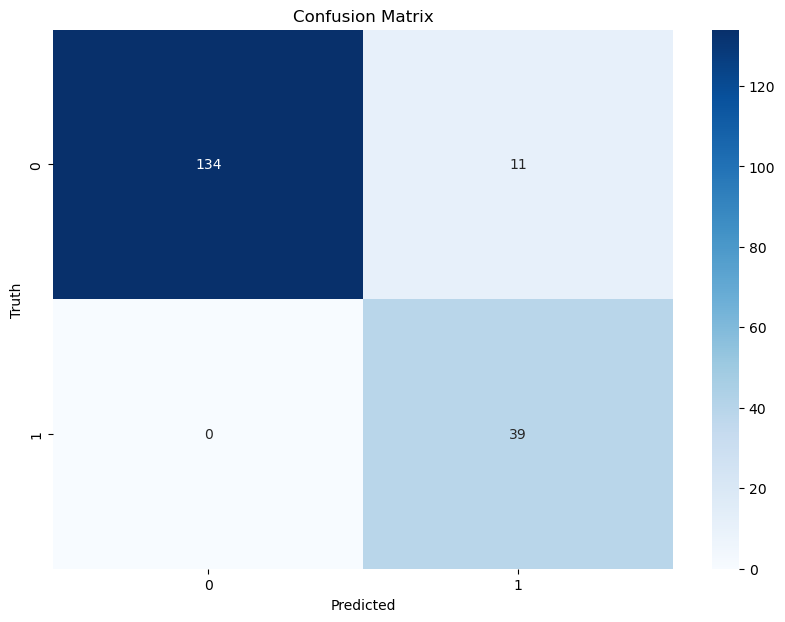

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.savefig('anxiety_cm2.png')
plt.show()

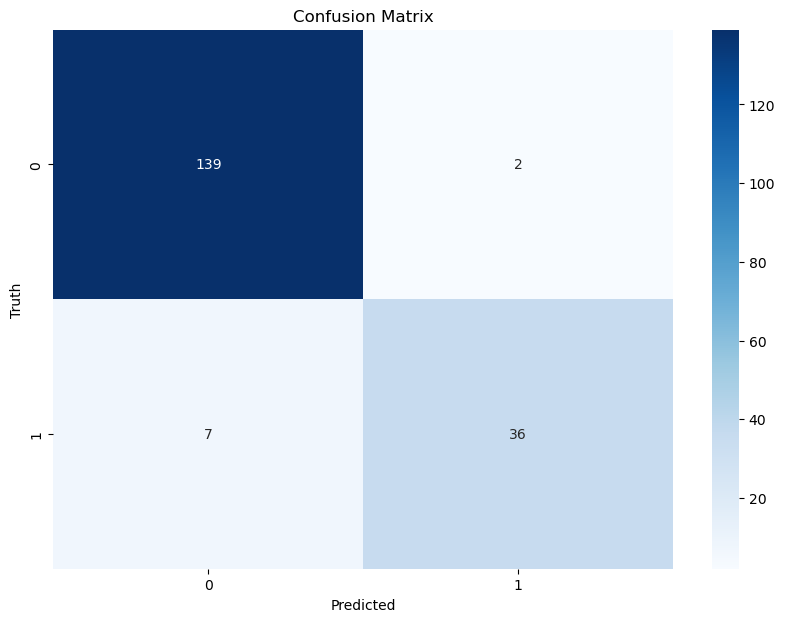

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.savefig('anxiety_cm1.png')
plt.show()